In [29]:
!pip install pandas_datareader

In [30]:
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style

In [31]:
style.use('fivethirtyeight')

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

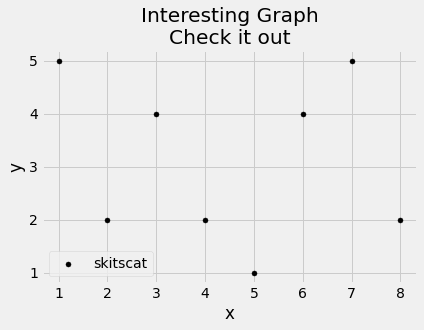

In [32]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8]
y = [5,2,4,2,1,4,5,2]

plt.scatter(x,y, label='skitscat', color='k', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

In [33]:
!pip install mpl_toolkits.basemap

ERROR: Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.basemap


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import datetime as dt
import matplotlib.dates as mdates

In [35]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')

    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)

    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    ax1.set_yticks([0,25,50,75])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

c:\users\piotr\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  


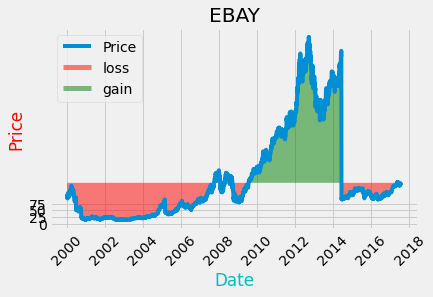

In [36]:
graph_data('EBAY')